# 1 
Lỗi trạng thái của hibernate

In [ ]:
-> sử dụng transaction
-> sử dụng @version, (xóa bảng để tạo lại)
-> sử dụng saveAndFlush()
-> sử dụng EntityManager-Jpql-@PersistenceContext

# 2


In [ ]:
org.springframework.dao.DataIntegrityViolationException: 

Detached entity with generated id '10' 

has an uninitialized version value 'null': 

com.example.demoKDLv1.Layer_Entity.KhachHangBuuDien.KhachHangBuuDien.version

In [ ]:
Hibernate: select top (?) mh1_0.mamh,mh1_0.gia,mh1_0.mota,mh1_0.size,mh1_0.thoigiannhaphang,mh1_0.trongluong,mh1_0.version from mat_hang mh1_0 order by newid()
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)

2025-05-05T17:21:11.577+07:00 ERROR 10512 --- [demoKDLv1] [0.1-8081-exec-6] o.a.c.c.C.[.[.[/].[dispatcherServlet]    : 

Servlet.service() for servlet [dispatcherServlet] in context with path [] 

threw exception [Request processing failed: org.springframework.dao.DataIntegrityViolationException: 

Detached entity with generated id '10' 

has an uninitialized version value 'null': 

com.example.demoKDLv1.Layer_Entity.KhachHangBuuDien.KhachHangBuuDien.version] with root cause

org.hibernate.PropertyValueException: Detached entity with generated id '10' has an uninitialized version value 'null': com.example.demoKDLv1.Layer_Entity.KhachHangBuuDien.KhachHangBuuDien.version

In [ ]:
-> khởi tạo xong MHDD rồi bị lỗi (nhìn "Hibernate:")
nguồn lỗi : 

In [ ]:
    public KhachHang createKhachhang(VanPhongDaiDien vpdd1){
        KhachHang kh1 = KhachHangFaker.createFakeKhachhang(vpdd1, this.allEntityConfig);

        kh1 = this.kh_Service.createKhachhang(kh1);

        List<DonDatHang> listDdh= 
            this.ddh_FS.createDdh(
                kh1, 
                allEntityConfig.getKhachhang().getSoDdh().getGiaTri()
            );

        KhachHangDuLich khdl= null; 
        KhachHangBuuDien khbd= null;

        Integer chooseNumber = new Random().nextInt(0, 1);

        if(chooseNumber==0){
            khbd = this.khbd_FS.createKhbd(kh1); 🟥🟥🟥🟥🟥
        }

        else{
            khdl = this.khdl_FS.createKhdl(kh1);
        }

        return kh1;
    }

In [ ]:
đoán = do hàm khởi tạo KHBD chưa có thêm version, do đó khbd bị null

# 3 trở lại lỗi 1

Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into don_dat_hang (makh,ngaydathang,version) values (?,?,?)
Hibernate: select top (?) mh1_0.mamh,mh1_0.gia,mh1_0.mota,mh1_0.size,mh1_0.thoigiannhaphang,mh1_0.trongluong,mh1_0.version from mat_hang mh1_0 order by newid()
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into don_dat_hang (makh,ngaydathang,version) values (?,?,?)
Hibernate: select top (?) mh1_0.mamh,mh1_0.gia,mh1_0.mota,mh1_0.size,mh1_0.thoigiannhaphang,mh1_0.trongluong,mh1_0.version from mat_hang mh1_0 order by newid()
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)
Hibernate: insert into mat_hang_duoc_dat (giadat,soluongdat,version,madon,mamh) values (?,?,?,?,?)

2025-05-05T17:49:14.301+07:00 ERROR 10512 --- 

[demoKDLv1] [0.1-8081-exec-3] o.a.c.c.C.[.[.[/].[dispatcherServlet]    : 

Servlet.service() for servlet [dispatcherServlet] 
in context with path [] 
threw exception 
[
    Request processing failed: 
    org.springframework.orm.ObjectOptimisticLockingFailureException: 

    Row was updated or deleted by another transaction 
    (or unsaved-value mapping was incorrect): 

    [
        com.example.demoKDLv1.Layer_Entity.KhachHangBuuDien.KhachHangBuuDien#11
    ]

] 

with root cause  

In [ ]:
https://www.baeldung.com/java-jpa-transaction-locks

(đoán lý do)

<img src="\3- Tổng hợp sửa đổi\Screenshot 2025-05-05 192520.png"/>

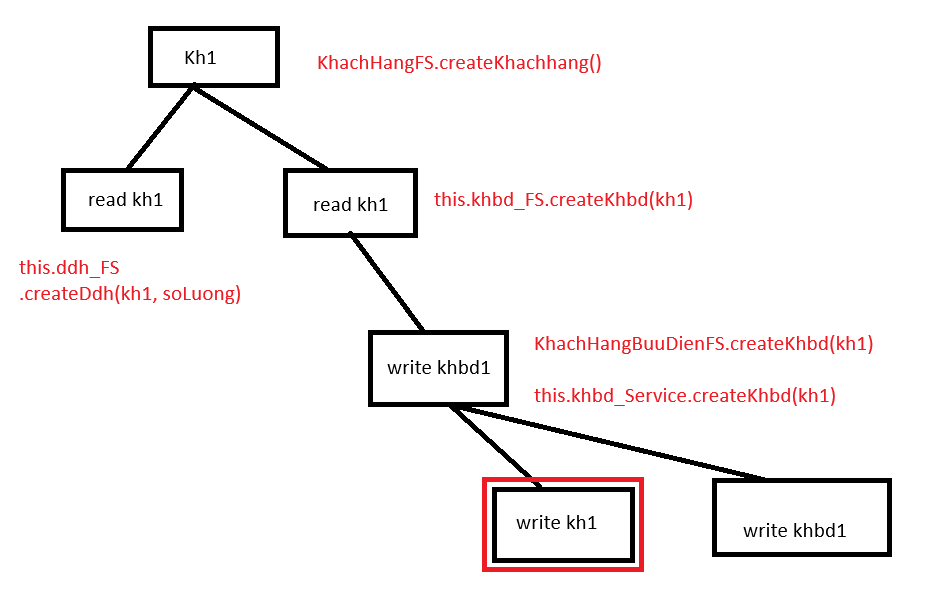

In [4]:
from IPython.display import Image;

Image(filename="3- Tổng hợp sửa đổi\\Screenshot 2025-05-05 192520.png")

Đây không phải là về khóa Optimistic. Ngoại lệ này được đưa ra khi xóa/cập nhật một bản ghi theo Id không tồn tại. Vì vậy, hãy kiểm tra xem bản ghi bạn đang cập nhật/xóa có thực sự tồn tại trong DB không.

Tuy nhiên, để hiểu rõ hơn nguyên nhân gây ra vấn đề, bạn có thể:

1) Đặt show_sql thành true 2) Đặt mức nhật ký cho Spring và Hibernate thành DEBUG

Điều này sẽ giúp bạn hiểu được vấn đề và khắc phục nó.

https://stackoverflow.com/questions/54948229/getting-objectoptimisticlockingfailureexception-without-version-annotation-or-op

https://discourse.hibernate.org/t/facing-with-objectoptimisticlocking-failureexception-after-migrating-to-hibernate-6-6-2-final/10725/10

Chúng tôi đang xóa tất cả các hàng khỏi kho lưu trữ bằng cách sử dụng repo.deleteAll()và sau đó lưu dữ liệu mới bằng repo.saveAll(data). Một số dữ liệu có thể tương tự như những gì đã có trước đó trong DB (vì chúng tôi chỉ sử dụng nó trong phương pháp sao chép dữ liệu từ prod sang db cục bộ. Chúng tôi đồng ý xóa mọi thứ khỏi DB trước khi chèn bản ghi mới).
Trước khi cập nhật, nó hoạt động tốt nhưng sau khi cập nhật, nó ObjectOptimisticLockingFailureExceptionbị báo lỗi.

EDIT:
Chúng tôi lưu các thực thể mới với các id đã được xác định. Xóa id khỏi các thực thể trước khi lưu chúng sẽ xóa ngoại lệ. Có tùy chọn nào để lưu các thực thể mới với các id đã được xác định trước và không nhận được ngoại lệ này không?

In [ ]:
ý chủ comment trên = get KhachHang-> delete KhachHang -> create KHBD

> Lỗi
could not execute statement [The DELETE statement conflicted with the REFERENCE constraint "FK7f7o8batqftxfciqjvmqj50ep". The conflict occurred in database "DemoKDLv1", table "dbo.don_dat_hang", column 'makh'.] [delete from khach_hang where makh=? and version=?]; SQL [delete from khach_hang where makh=? and version=?]; constraint [null]

do khach hang có bảng DonDatHang phụ thuộc nên không xóa được

https://www.google.com/search?q=save+inherited+object+in+jpa+spring+boot

0

Hãy xem chú thích @MappedSuperclassvà InheritanceType.SINGLE_TABLE. Để đạt được chính xác những gì bạn muốn, bạn sẽ phải sử dụng một trong hai chiến lược kế thừa đó trong mã để các bảng được ánh xạ chính xác.

Một số ví dụ: https://www.baeldung.com/hibernate-inheritance

Ngoài ra: JPA: Triển khai Mô hình phân cấp - @MappedSuperclass so với @Inheritance

Lý do sai 1 = class kế thừa phải đối xử khác

https://www.google.com/search?q=save+inherited+object+in+jpa+spring+boot

https://stackoverflow.com/questions/63485814/why-does-hibernate-need-to-save-the-parent-when-saving-the-child-and-cause-a-opt
Nó KHÔNG cần trừ khi bạn cần. Hãy làm như sau:

    University universityProxy = universidyRepository.getOne(universityId);
    student.setUniversity(universityProxy);
Để gán a, Universitybạn không cần phải tải một Universitythực thể vào ngữ cảnh. Bởi vì về mặt kỹ thuật, bạn chỉ cần lưu hồ sơ sinh viên với khóa ngoại thích hợp ( university_id). Vì vậy, khi bạn có a university_id, bạn có thể tạo proxy Hibernate bằng phương thức kho lưu trữ getOne().

In [ ]:
clone = bọc wrapper 

before : return kh1;

after : return this.wrapper(kh1);

getOne() lỗi thời, sửa dụng getReferenceById()

Bạn chỉ có thể yêu javadoc củaJpaRepository.getReferenceById(ID id)

tôi đang sử dụng java , tôi muốn tạo phương thức toString(a) trong 1 interface, với a có thể là bất kỳ class nào

sử dụng `<T>`

tôi đang sử dụng java , tôi muốn tạo phương thức toString(listA) trong 1 interface, với a có thể là bất kỳ loại collection nào

sử dụng `Collection<T>`

https://stackoverflow.com/questions/53777766/updating-child-entity-but-saving-parent-entity-leads-to-objectoptimisticlockingf?rq=3

ChildTất nhiên là nên thêm kho lưu trữ cho chính nó nhưng tôi nghi ngờ rằng nó sẽ giải quyết được vấn đề của bạn.

Bạn vẫn phải cập nhật phần cha mẹ với phần con nên bạn vẫn có hai parentRepository.save(parent);hành động nếu tôi hiểu đúng trường hợp của bạn. Vì vậy, dù sao thì bạn cũng sẽ kết thúc với một OptimisticLockExceptiontại một thời điểm nào đó.

Tôi chỉ đơn giản áp dụng quy trình chung để xử lý loại ngoại lệ đó như sau:

Bắt đượcOptimisticLockException
Hợp nhất thực thể mà lưu ngoại lệ đã xảy ra
Thử lại persist / update một lần nữa

In [ ]:
        // thử 10 lần
        int maxTry = 10;
        for(int i=0; i< maxTry; i++){

            // tạo KHBD hoặc KHDL
            try {
                KhachHangDuLich khdl= null;
                KhachHangBuuDien khbd= null;

                Integer chooseNumber = new Random().nextInt(0, 1);

                if(chooseNumber==0){
                    khbd = this.khbd_FS.createKhbd(kh1);
                }

                else{
                    khdl = this.khdl_FS.createKhdl(kh1);
                }
            }
            
            catch (ObjectOptimisticLockingFailureException e) {
                // nothing 
            }

            // ngủ 2 s
            try {
                Thread.sleep(2000);
                System.out.println("\n\n\n\n 🟩🟩🟩🟩 sleep in 2 s 🟩🟩🟩🟩 \n\n\n\n\n");
            } catch (InterruptedException e) {
                e.printStackTrace();
            }
        }

> # vẫn không tạo được KHBD KHDL

In [ ]:
public KhachHang createKhachhang(VanPhongDaiDien vpdd1){
    KhachHang kh1 = KhachHangFaker.createFakeKhachhang(vpdd1, this.allEntityConfig);



    kh1 = this.kh_Service.createKhachhang(kh1); // 🔸🔸🔸 chạy hàm này tương đương với = KhachHang_Repo chiếm tài nguyên kh1 với lệnh cấm write

    List<DonDatHang> listDdh= 
        this.ddh_FS.createDdh(
            kh1, 
            allEntityConfig.getKhachhang().getSoDdh().getGiaTri()
        );

    // 🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩
    KhachHangDuLich khdl= null;
    KhachHangBuuDien khbd= null;

    Integer chooseNumber = new Random().nextInt(0, 1);

    if(chooseNumber==0){
        khbd = this.khbd_FS.createKhbd(kh1);// 🔸🔸🔸 chạy hàm này tương đương với = KhachHangDuLich_Repo chiếm tài nguyên kh1 với quyền write = 🟥 xung đột

    }

    else{
        khdl = this.khdl_FS.createKhdl(kh1);// 🔸🔸🔸 tương tự

    }
    // 🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩 




    return kh1;
}

In [ ]:
(giấu lỗi)

In [ ]:

public KhachHang createKhachhang(VanPhongDaiDien vpdd1){
    KhachHang kh1 = KhachHangFaker.createFakeKhachhang(vpdd1, this.allEntityConfig);

    // 🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩
    KhachHangDuLich khdl= null;
    KhachHangBuuDien khbd= null;

    Integer chooseNumber = new Random().nextInt(0, 1);

    if(chooseNumber==0){
        khbd = this.khbd_FS.createKhbd(kh1);

        kh1= this.kh_Service.getKhachhangById(khbd.getMaKH());
    }

    else{
        khdl = this.khdl_FS.createKhdl(kh1);

        kh1= this.kh_Service.getKhachhangById(khdl.getMaKH());
    }
    // 🟩🟩🟩🟩🟩🟩🟩🟩🟩🟩 

    // kh1 = this.kh_Service.createKhachhang(kh1);

    List<DonDatHang> listDdh= 
        this.ddh_FS.createDdh(
            kh1, 
            allEntityConfig.getKhachhang().getSoDdh().getGiaTri()
        );

    return kh1;
}
